<a href="https://colab.research.google.com/github/tawaqalt/Projects/blob/main/Wholesale_Customer_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importation of Libraries

In [9]:
import pandas as pd
import numpy as np

In [1]:
#checking how the scratch implementation will perform on a dataset
# reading the dataset
df = pd.read_csv('/content/Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [3]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
df.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [5]:
df.duplicated().sum()

0

In [6]:
data = df.drop(columns=['Channel', 'Region'])

The data preprocessing shows that the data is cleaned and I will go ahead to process the data

## Dimensionality reduction

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(data)
data_pca = pca.transform(data)

[0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


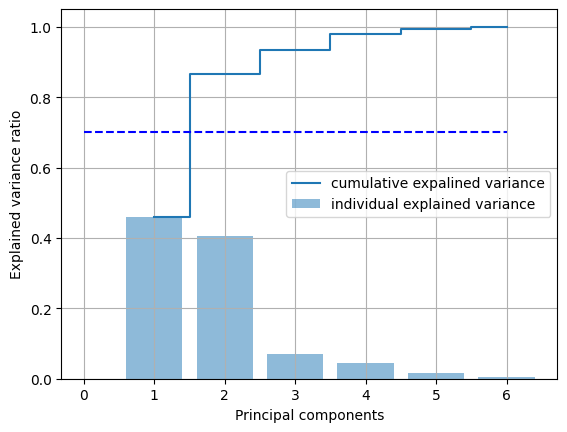

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#plotting the  PCA to check for the best number of components
pca = PCA(n_components=None)
pca = pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

The diagram shows that the optimal number of clusters is 2

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
sse = []
cl_num = []
for i in range(1, 20):
  cl_num.append(i)
  km = KMeans(n_clusters = i, max_iter = 100, verbose=False, random_state =0)
  km.fit(data_pca)
  sse.append(km._compute_sse(data_pca, km.centroids, km.cluster_assignments))
plt.plot(cl_num, sse, marker='o', markeredgecolor = 'red')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


AttributeError: 'KMeans' object has no attribute '_compute_sse'

I deduced from the elbow plot that 5 might be the best number of clusters but I'll like to use plotting of the cluster to verify this

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

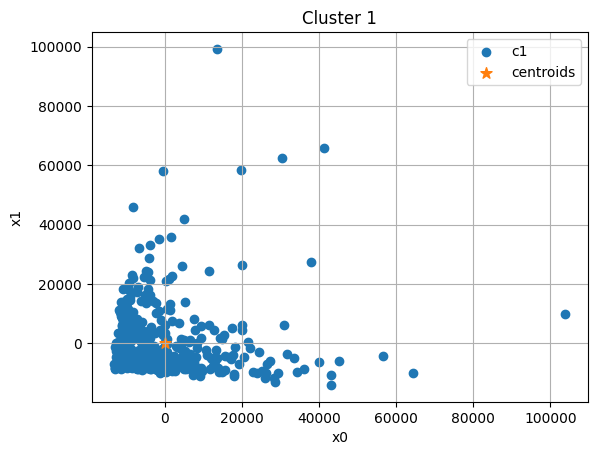

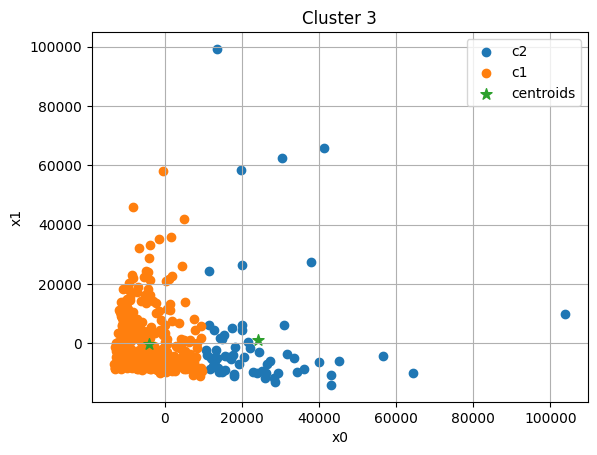

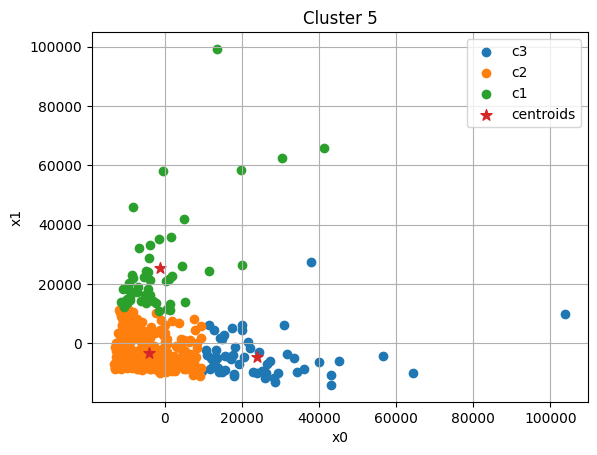

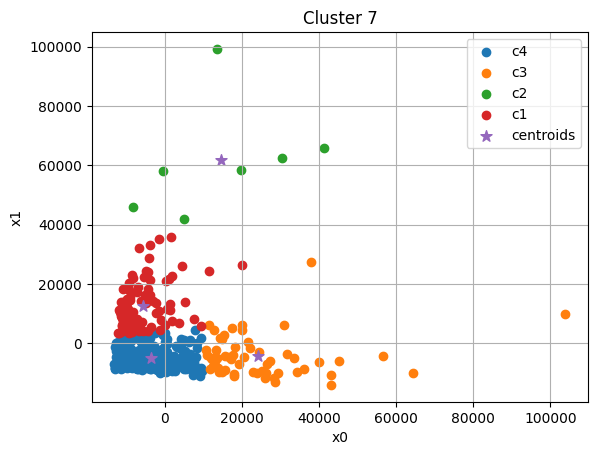

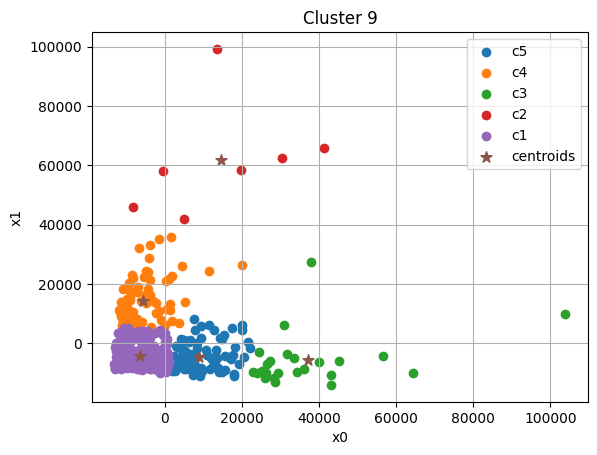

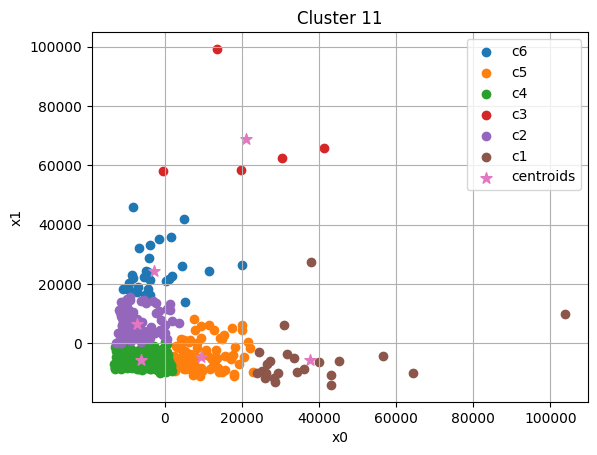

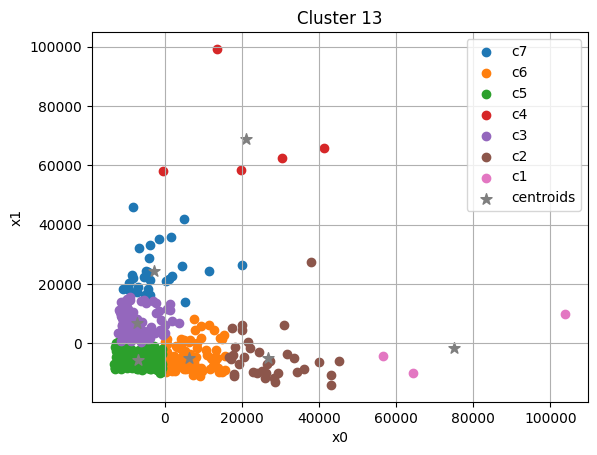

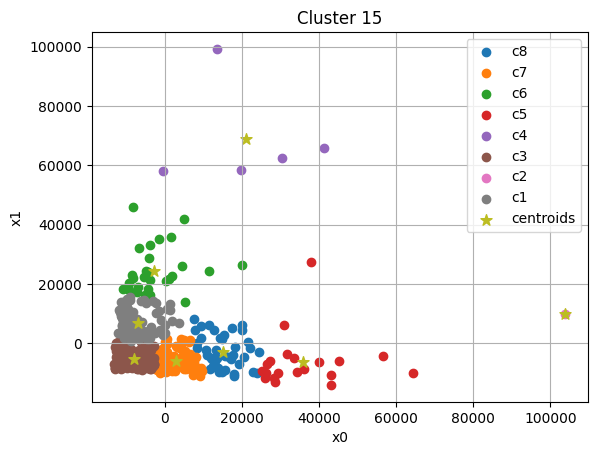

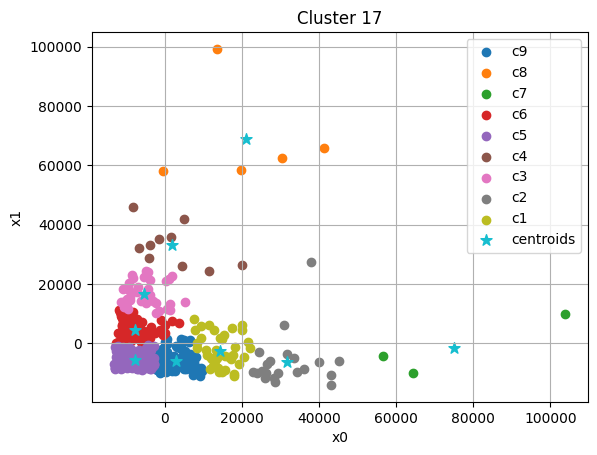

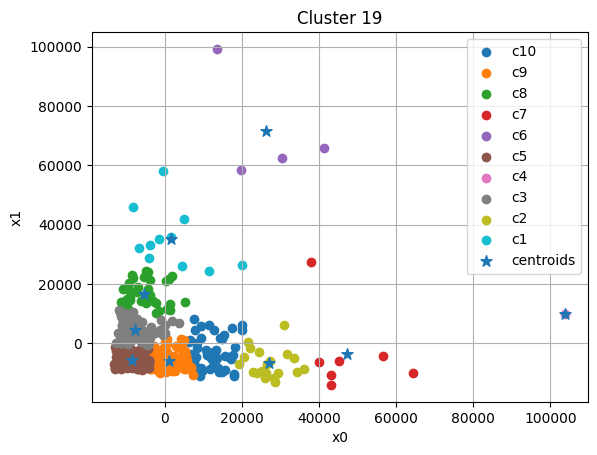

In [15]:
#plotting the number of cluster in the range of 1 - 10
for i in range(1, 11):
  new_km = KMeans(n_clusters = i, max_iter=15, verbose=False, tol=0, random_state=0)
  new_km.fit(data_pca)
  cl = new_km.predict(data_pca)

  fig = plt.figure()
  ax = fig.add_subplot(1,1,1)

  for l in range(np.unique(cl).shape[0]):
    ax.scatter(data_pca[:, 0][cl==l], data_pca[:, 1][cl==l], label='c{}'.format(i-l))
  # Use cluster_centers_ to access the cluster centers
  ax.scatter(new_km.cluster_centers_[:, 0], new_km.cluster_centers_[:, 1], s=70, marker='*', label='centroids')
  ax.set_title('Cluster {}'.format(i+l))
  ax.set_xlabel('x0')
  ax.set_ylabel('x1')
  ax.legend()
  ax.grid(True)

  ax.legend(loc='upper right')
  fig.show()

the visualizations supports the optimal number of clusters predicted by the elbow method.

In [16]:
#checking for the value counts of the Known Groups(Region and channel)
df.Region.value_counts()

,count
Region,
3,316
1,77
2,47


there are three unique values in the Region column so this translates to the number of clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


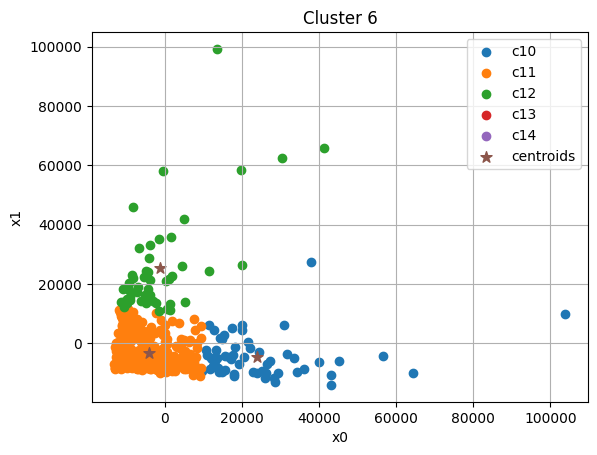

In [18]:
#plotting  with the number of unique values
new_km = KMeans(n_clusters = 3, max_iter=15, verbose=False, tol=0, random_state=0)
new_km.fit(data_pca)
cl = new_km.predict(data_pca)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for l in range(5):
  ax.scatter(data_pca[:, 0][cl==l], data_pca[:, 1][cl==l], label='c{}'.format(i+l))
# Use cluster_centers_ to access the cluster centers
ax.scatter(new_km.cluster_centers_[:, 0], new_km.cluster_centers_[:, 1], s=70, marker='*', label='centroids')
ax.set_title('Cluster {}'.format(i-l))
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.legend()
ax.grid(True)

ax.legend(loc='upper right')
fig.show()

## **Region**

Text(0.5, 1.0, 'Cluster')

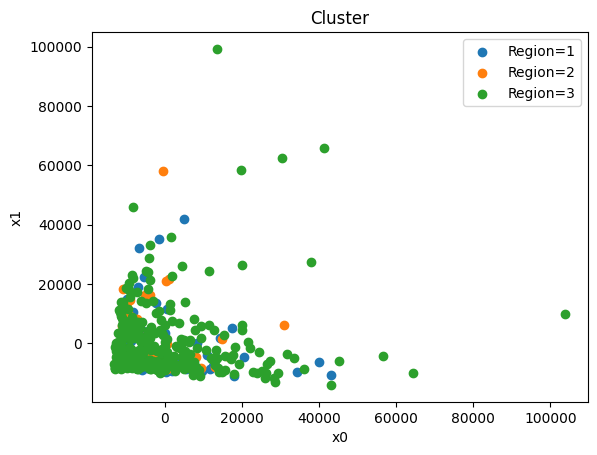

In [19]:
df.Region.unique()
#plotting the unique values
plt.scatter(data_pca[:, 0][df['Region']==1], data_pca[:, 1][df['Region']==1], label='Region=1')
plt.scatter(data_pca[:, 0][df['Region']==2], data_pca[:, 1][df['Region']==2], label='Region=2')
plt.scatter(data_pca[:, 0][df['Region']==3], data_pca[:, 1][df['Region']==3], label='Region=3')
plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.title('Cluster')

In [20]:
#checking for the value counts of the Known Groups(Region and channel)
df.Channel.value_counts()

,count
Channel,
1,298
2,142


there are three unique values in the Region column so this translates to the number of clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


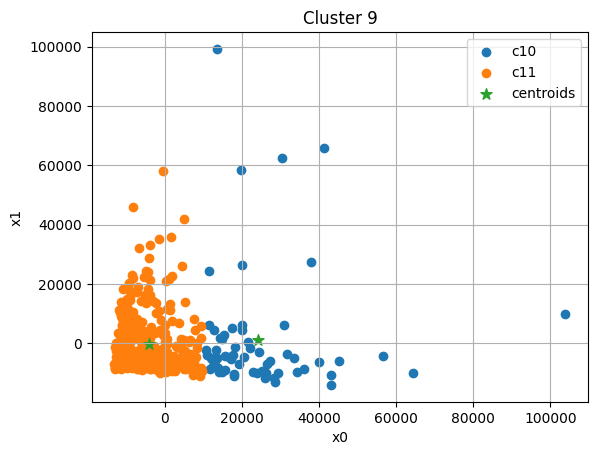

In [22]:
#plotting  with the number of unique values
new_km = KMeans(n_clusters = 2, max_iter=15, verbose=False, tol=0, random_state=0)
new_km.fit(data_pca)
cl = new_km.predict(data_pca)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for l in range(2):
  ax.scatter(data_pca[:, 0][cl==l], data_pca[:, 1][cl==l], label='c{}'.format(i+l))
# Access cluster centers using cluster_centers_
ax.scatter(new_km.cluster_centers_[:, 0], new_km.cluster_centers_[:, 1], s=70, marker='*', label='centroids')
ax.set_title('Cluster {}'.format(i-l))
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.legend()
ax.grid(True)

ax.legend(loc='upper right')
fig.show()

## **Region**

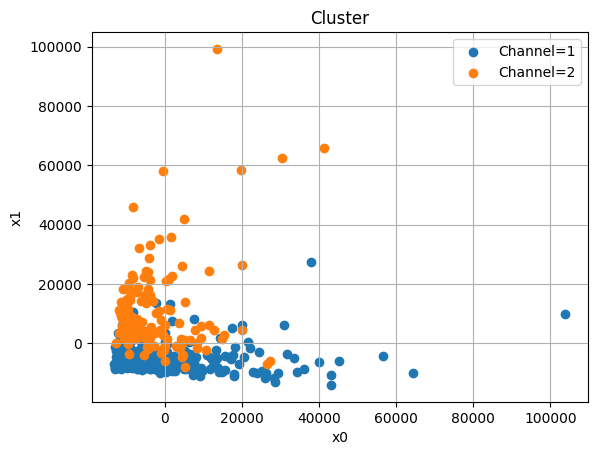

In [23]:
df.Region.unique()
#plotting the unique values
plt.scatter(data_pca[:, 0][df['Channel']==1], data_pca[:, 1][df['Channel']==1], label='Channel=1')
plt.scatter(data_pca[:, 0][df['Channel']==2], data_pca[:, 1][df['Channel']==2], label='Channel=2')
plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.title('Cluster')
plt.grid(True)

Insight: Comparing the two plots(own clusters vs Region/Channel), it is very obvious that the plot that KMeans clustering was applied showed better results as the second plot had an overlap of the data points. This reveals that the Kmeans clustering can accurately classifies data points into groups.

In [24]:
data['cluster'] = cl
data.head(10)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,1
2,6353,8808,7684,2405,3516,7844,1
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,0
5,9413,8259,5126,666,1795,1451,1
6,12126,3199,6975,480,3140,545,1
7,7579,4956,9426,1669,3321,2566,1
8,5963,3648,6192,425,1716,750,1
9,6006,11093,18881,1159,7425,2098,1


**FRESH**

In [25]:
data.cluster.unique()

array([1, 0], dtype=int32)

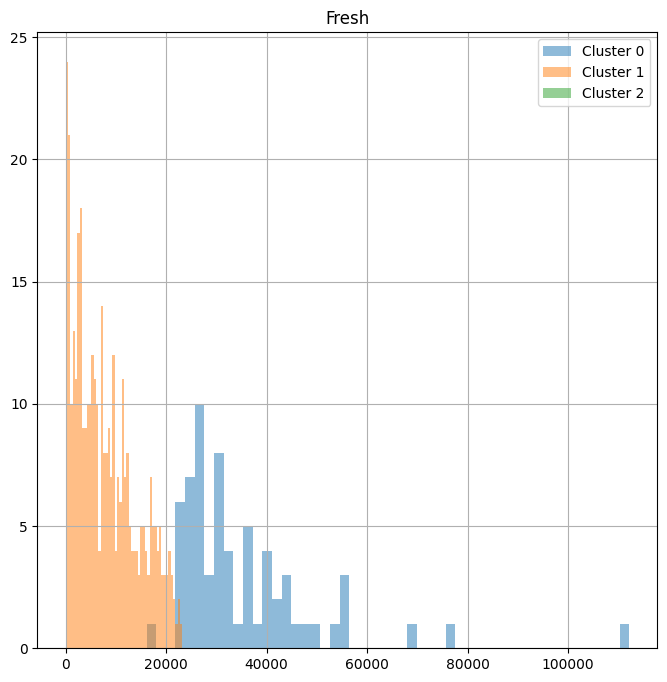

In [26]:
data_cl0 = df[data['cluster']==0]
data_cl1 = df[data['cluster']==1]
data_cl2 = df[data['cluster']==2]
fig, ax = plt.subplots(ncols=1, figsize=(8,8))
ax.hist(data_cl0['Fresh'], bins=50, alpha=0.5, label='Cluster 0')
ax.hist(data_cl1['Fresh'],  bins=50, alpha=0.5, label='Cluster 1')
ax.hist(data_cl2['Fresh'], bins=50, alpha=0.5, label='Cluster 2')
ax.set_title('Fresh')
ax.legend(loc='upper right')
ax.grid(True)

# Plotting with the number of channel

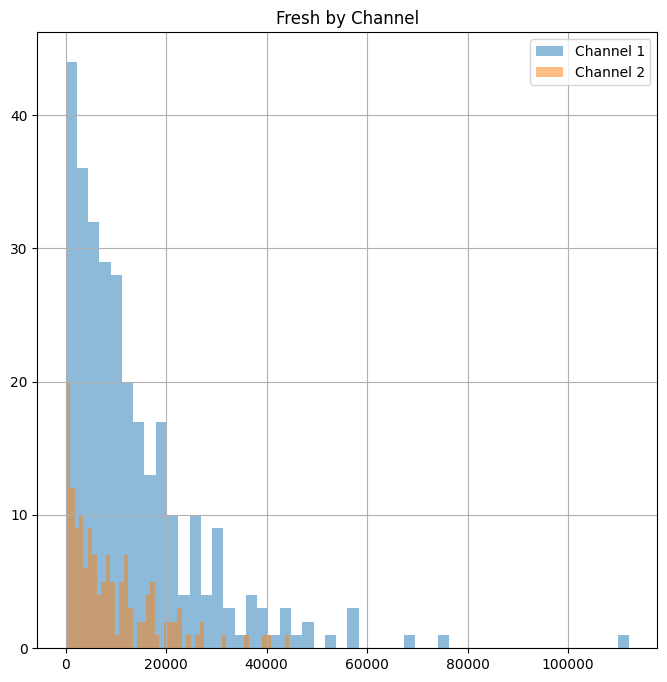

In [27]:
fig, ax = plt.subplots(ncols=1, figsize=(8,8))
ax.hist(df['Fresh'][df['Channel'] == 1], bins=50, alpha=0.5, label='Channel 1')
ax.hist(df['Fresh'][df['Channel'] == 2], bins=50, alpha=0.5, label='Channel 2')
ax.set_title('Fresh by Channel')
ax.legend(loc='upper right')
ax.grid(True)

this shows that people purchasing through channel one are more than Channel 2

**MILK**

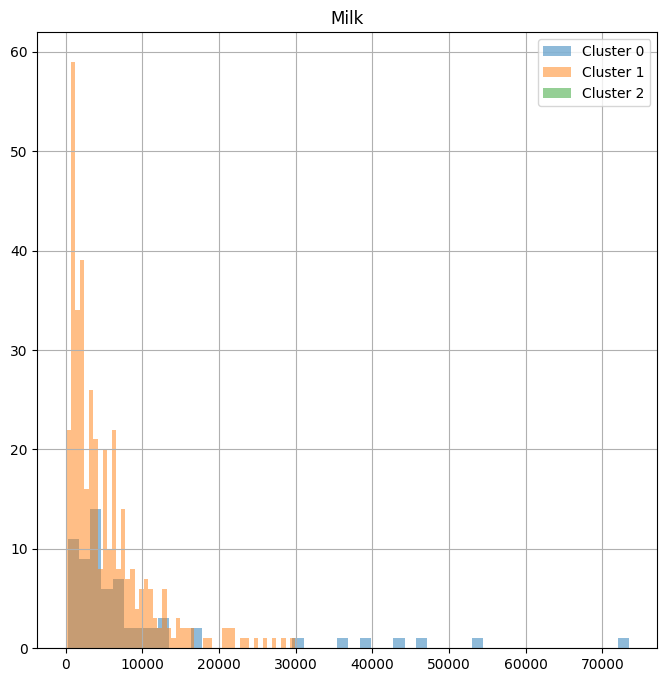

In [28]:
fig, ax = plt.subplots(ncols=1, figsize=(8,8))
ax.hist(data_cl0['Milk'], bins=50, alpha=0.5, label='Cluster 0')
ax.hist(data_cl1['Milk'],  bins=50, alpha=0.5, label='Cluster 1')
ax.hist(data_cl2['Milk'], bins=50, alpha=0.5, label='Cluster 2')
ax.set_title('Milk')
ax.legend(loc='upper right')
ax.grid(True)

PLotting with the Region

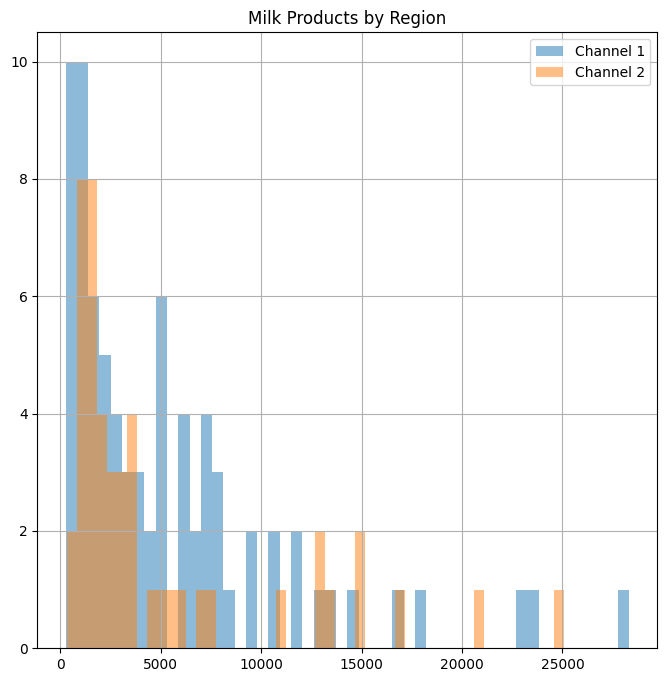

In [29]:
fig, ax = plt.subplots(ncols=1, figsize=(8,8))
ax.hist(df['Milk'][df['Region'] == 1], bins=50, alpha=0.5, label='Channel 1')
ax.hist(df['Milk'][df['Region'] == 2], bins=50, alpha=0.5, label='Channel 2')
ax.set_title('Milk Products by Region')
ax.legend(loc='upper right')
ax.grid(True)

the visaulization reveals that although Region onw still has higher number of customers that purchases milk, region 2 also has an impressive number of customers.

**GROCERY**

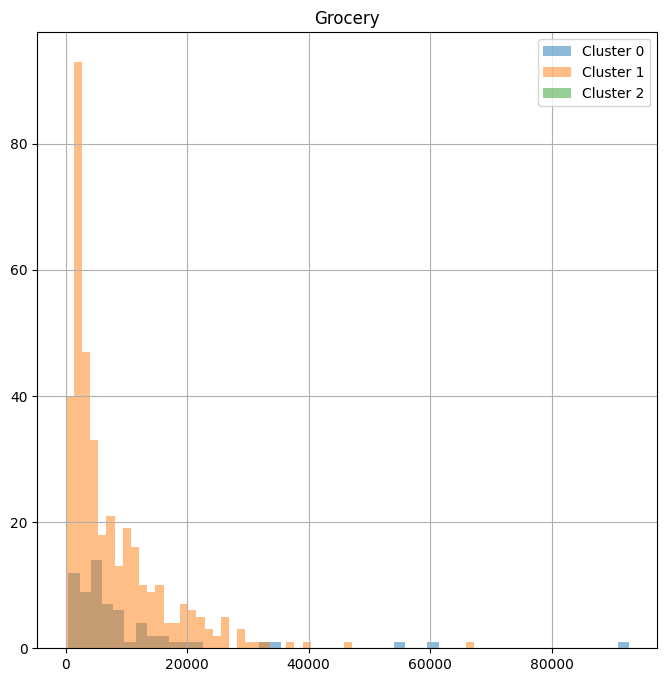

In [30]:
fig, ax = plt.subplots(ncols=1, figsize=(8,8))
ax.hist(data_cl0['Grocery'], bins=50, alpha=0.5, label='Cluster 0')
ax.hist(data_cl1['Grocery'],  bins=50, alpha=0.5, label='Cluster 1')
ax.hist(data_cl2['Grocery'], bins=50, alpha=0.5, label='Cluster 2')
ax.set_title('Grocery')
ax.legend(loc='upper right')
ax.grid(True)

Plotting with munber of Channel

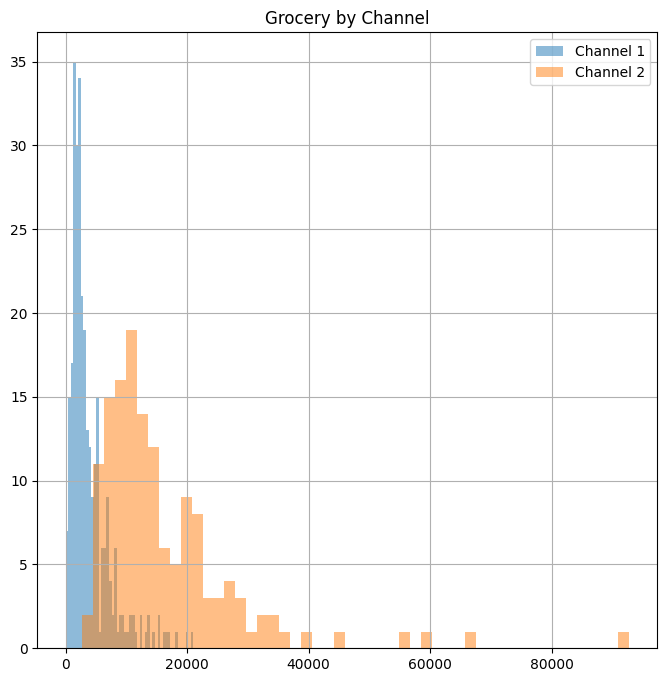

In [31]:
fig, ax = plt.subplots(ncols=1, figsize=(8,8))
ax.hist(df['Grocery'][df['Channel'] == 1], bins=50, alpha=0.5, label='Channel 1')
ax.hist(df['Grocery'][df['Channel'] == 2], bins=50, alpha=0.5, label='Channel 2')
ax.set_title('Grocery by Channel')
ax.legend(loc='upper right')
ax.grid(True)

**FROZEN**

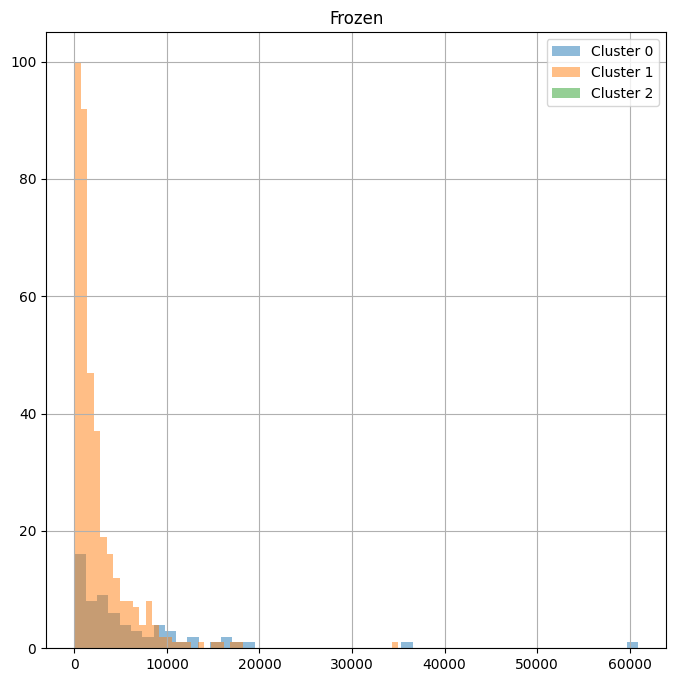

In [32]:
# **FROZEN**
fig, ax = plt.subplots(ncols=1, figsize=(8,8))
ax.hist(data_cl0['Frozen'], bins=50, alpha=0.5, label='Cluster 0')
ax.hist(data_cl1['Frozen'],  bins=50, alpha=0.5, label='Cluster 1')
ax.hist(data_cl2['Frozen'], bins=50, alpha=0.5, label='Cluster 2')
ax.set_title('Frozen')
ax.legend(loc='upper right')
ax.grid(True)

Plotting with the Number of Channel

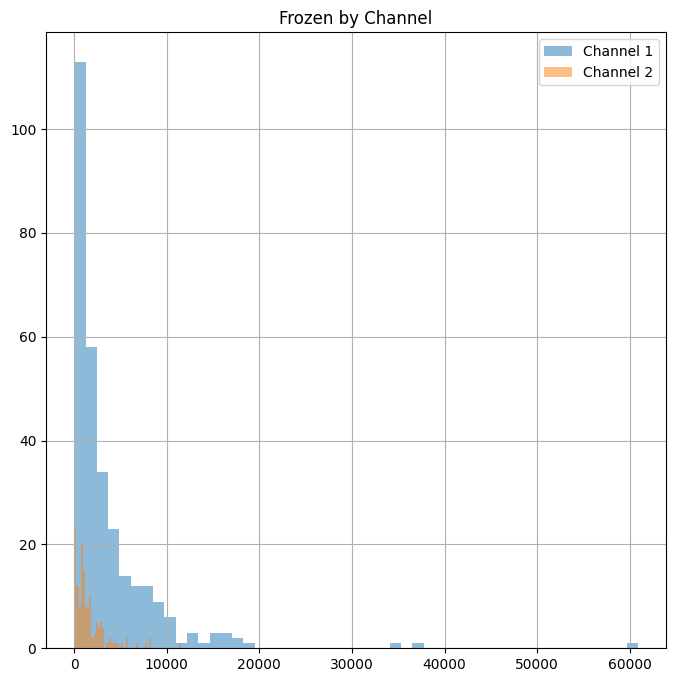

In [33]:
# Plotting with munber of Channel
fig, ax = plt.subplots(ncols=1, figsize=(8,8))
ax.hist(df['Frozen'][df['Channel'] == 1], bins=50, alpha=0.5, label='Channel 1')
ax.hist(df['Frozen'][df['Channel'] == 2], bins=50, alpha=0.5, label='Channel 2')
ax.set_title('Frozen by Channel')
ax.legend(loc='upper right')
ax.grid(True)

**DETERGENT**

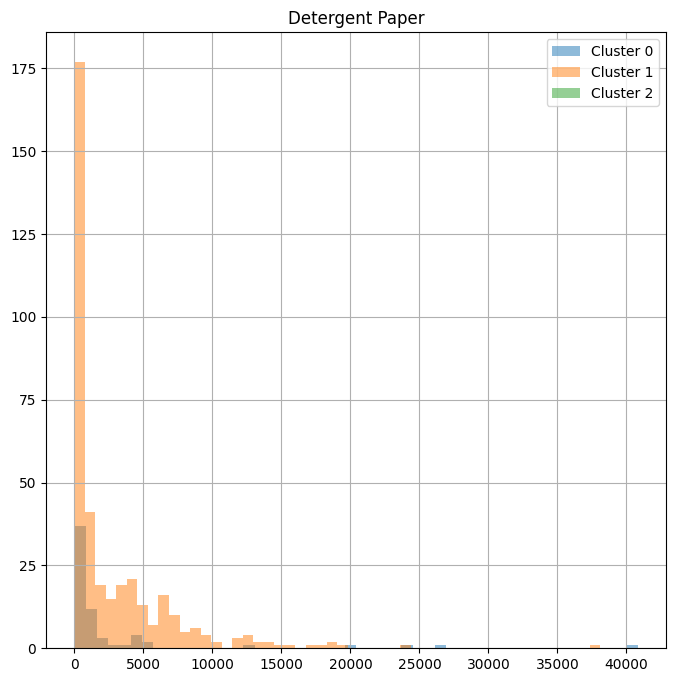

In [34]:
# **DETERGENT_PAPER**
fig, ax = plt.subplots(ncols=1, figsize=(8,8))
ax.hist(data_cl0['Detergents_Paper'], bins=50, alpha=0.5, label='Cluster 0')
ax.hist(data_cl1['Detergents_Paper'],  bins=50, alpha=0.5, label='Cluster 1')
ax.hist(data_cl2['Detergents_Paper'], bins=50, alpha=0.5, label='Cluster 2')
ax.set_title('Detergent Paper')
ax.legend(loc='upper right')
ax.grid(True)

# Plotting with munber of Channel

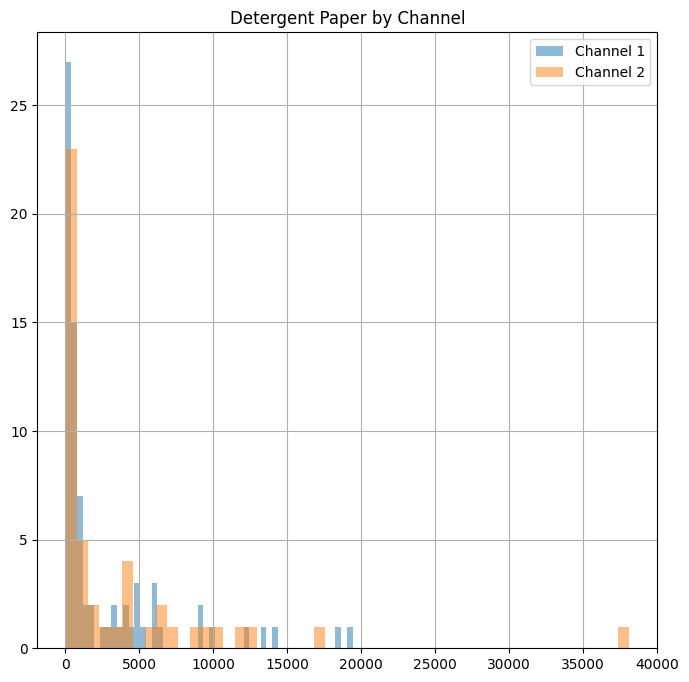

In [36]:
# Plotting with munber of Channel
fig, ax = plt.subplots(ncols=1, figsize=(8,8))
ax.hist(df['Detergents_Paper'][df['Region'] == 1], bins=50, alpha=0.5, label='Channel 1')
ax.hist(df['Detergents_Paper'][df['Region'] == 2], bins=50, alpha=0.5, label='Channel 2')
ax.set_title('Detergent Paper by Channel')
ax.legend(loc='upper right')
ax.grid(True)

# **DELICASSEN**

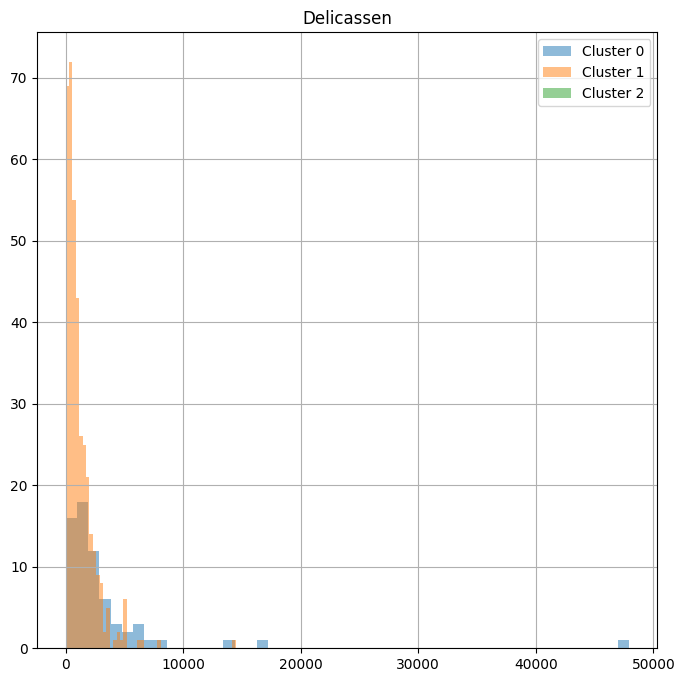

In [35]:
# **DELICASSEN**
fig, ax = plt.subplots(ncols=1, figsize=(8,8))
ax.hist(data_cl0['Delicassen'], bins=50, alpha=0.5, label='Cluster 0')
ax.hist(data_cl1['Delicassen'],  bins=50, alpha=0.5, label='Cluster 1')
ax.hist(data_cl2['Delicassen'], bins=50, alpha=0.5, label='Cluster 2')
ax.set_title('Delicassen')
ax.legend(loc='upper right')
ax.grid(True)

# Plotting with munber of Channel

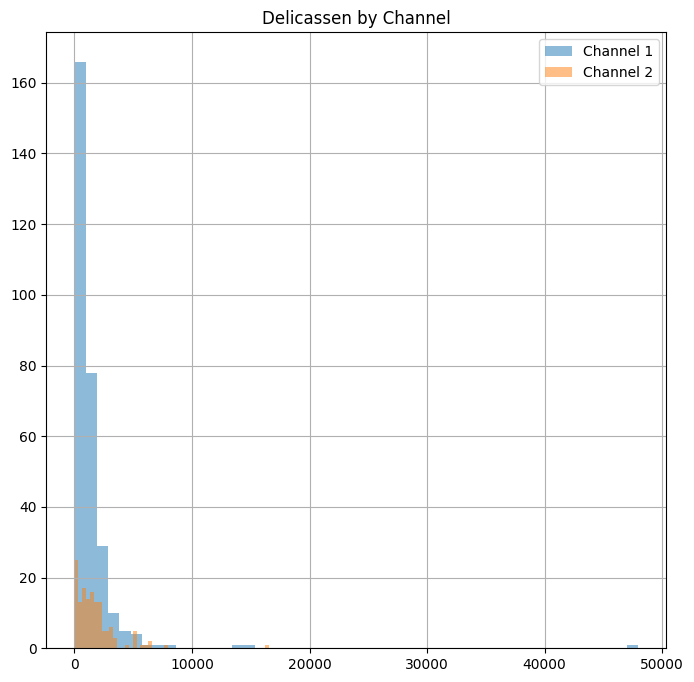

In [37]:

# Plotting with munber of Channel
fig, ax = plt.subplots(ncols=1, figsize=(8,8))
ax.hist(df['Delicassen'][df['Channel'] == 1], bins=50, alpha=0.5, label='Channel 1')
ax.hist(df['Delicassen'][df['Channel'] == 2], bins=50, alpha=0.5, label='Channel 2')
ax.set_title('Delicassen by Channel')
ax.legend(loc='upper right')
ax.grid(True)

Overall, KMeasn clustering was used to check patterns in behaviour of customers and this analysis gave an insight on the most loyal customers and the products that has the highest patronage. this can also help the wholeslaer to know which products to give utmost priority and the region oe channels that brings the most profit.

# **Useful Information for the Wholesalers**

In [38]:
data2 = pd.read_csv('/content/Wholesale customers data.csv')
data2 = data2.drop(columns=['Channel', 'Region'])
data2.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [40]:
kmi = KMeans(n_clusters=5, max_iter=15, verbose=False, tol=0, random_state=0)
kmi.fit(data_pca)
cl1 = kmi.predict(data_pca)
data_cll0 = data2[cl1==0]
data_cll1 = data2[cl1==1]
data_cll2 = data2[cl1==2]
data_cll3 = data2[cl1==3]
data_cll4 = data2[cl1==4]
cl_data = pd.DataFrame(cl1)
cl_data.head()
cl_data = cl_data.rename(columns={0:'cluster'})
#adding the cluster column to the data
data_add_cl = pd.concat([data2, cl_data], axis=1)

data_add_cl =data_add_cl.groupby('cluster').mean()
data_add_cl

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
0,21337.549020,3933.852941,5176.068627,4182.784314,1138.107843,1713.029412
1,5069.544304,12284.759494,18694.658228,1618.151899,8192.670886,1835.354430
2,48777.375000,6607.375000,6197.791667,9462.791667,932.125000,4435.333333
3,20031.285714,38084.000000,56126.142857,2564.571429,27644.571429,2548.142857
4,6106.714912,3304.574561,4175.855263,2421.548246,1266.078947,995.333333


from the statistics, one can deduce that Detergents paper has the least patronage majorly in cluster 1 and 4, this will require the wholesaler to try and gain visibility to increase sales in that region/channel

# Distribution of resources

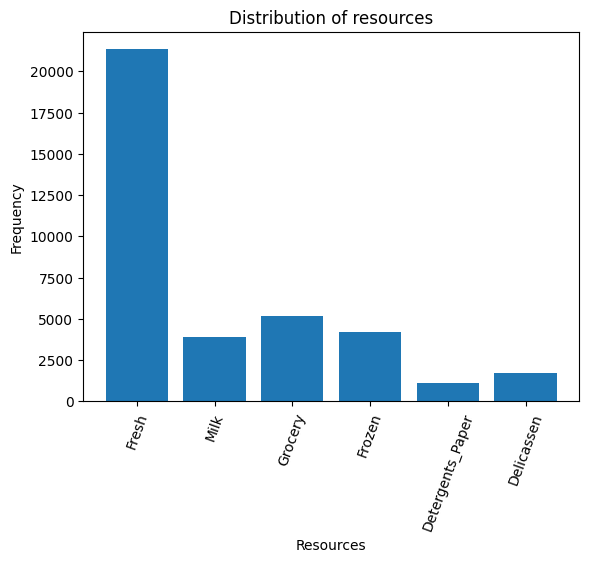

In [41]:
height = np.array(data_add_cl.iloc[0])
plt.bar(data_add_cl.columns, height)
plt.title('Distribution of resources')
plt.xlabel('Resources')
plt.ylabel('Frequency')
plt.xticks(rotation=70)
plt.show()

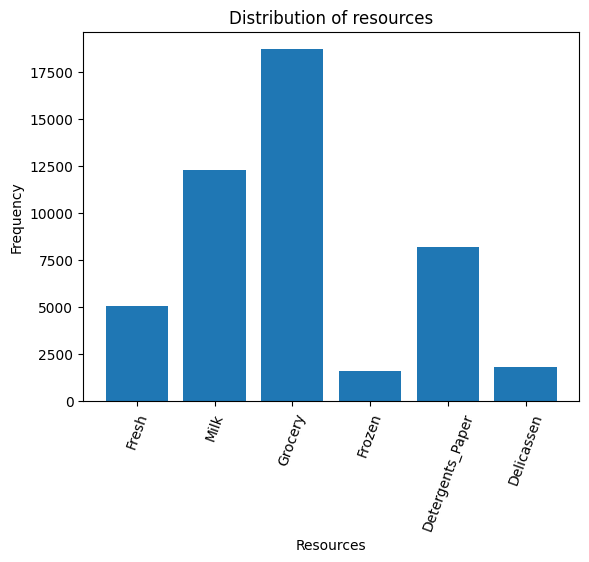

In [42]:
height = np.array(data_add_cl.iloc[1])
plt.bar(data_add_cl.columns, height)
plt.title('Distribution of resources')
plt.xlabel('Resources')
plt.ylabel('Frequency')
plt.xticks(rotation=70)
plt.show()

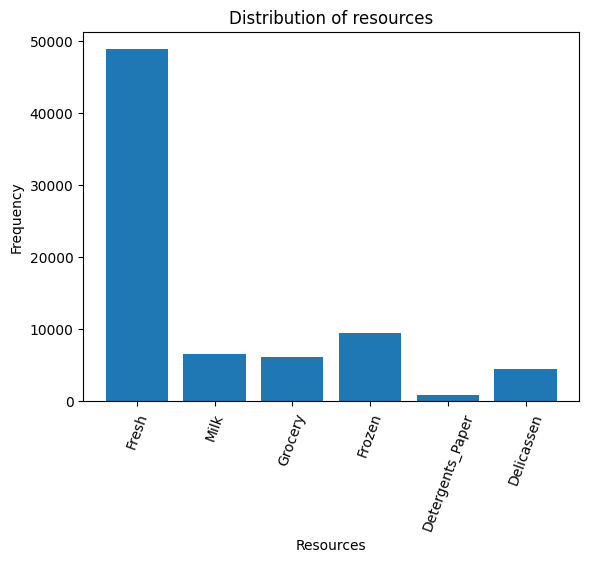

In [43]:
height = np.array(data_add_cl.iloc[2])
plt.bar(data_add_cl.columns, height)
plt.title('Distribution of resources')
plt.xlabel('Resources')
plt.ylabel('Frequency')
plt.xticks(rotation=70)
plt.show()

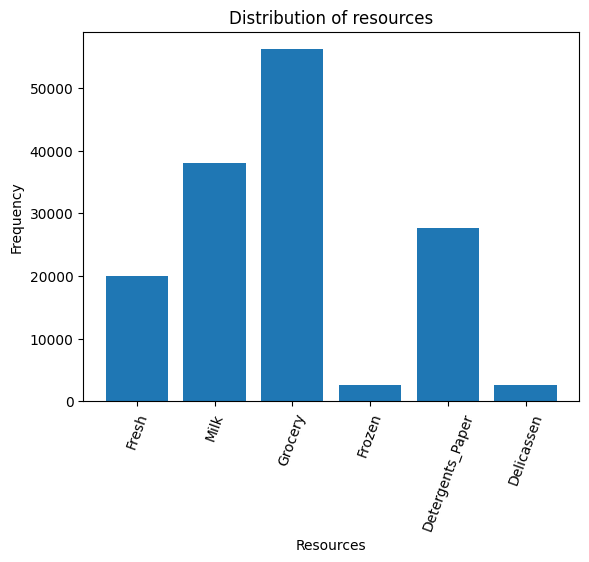

In [44]:
height = np.array(data_add_cl.iloc[3])
plt.bar(data_add_cl.columns, height)
plt.title('Distribution of resources')
plt.xlabel('Resources')
plt.ylabel('Frequency')
plt.xticks(rotation=70)
plt.show()

the plot for the Distribution of resources portrays that cluster one had the highest distribution for Fresh products i.e has more patronages than any of the other produtcs while for cluster 3 Grocery had the highest but other products also showed an impressive performanace.